In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")



In [2]:
DATA_PATH = "../data/raw/creditcard.csv"

df = pd.read_csv(DATA_PATH)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print("Shape:", df.shape)
print("\nData Types:\n")
print(df.dtypes)
print("\nMissing Values:\n")
print(df.isnull().sum())


Shape: (284807, 31)

Data Types:

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing Values:

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtyp

In [4]:
df["Class"].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
df["Class"].value_counts(normalize=True) * 100


Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

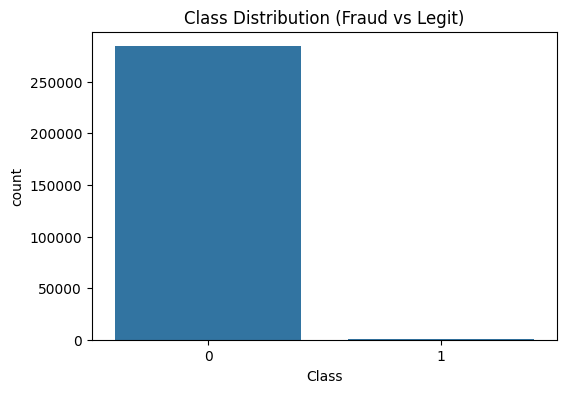

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=df)
plt.title("Class Distribution (Fraud vs Legit)")
plt.show()


In [7]:
df["Amount"].describe()


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

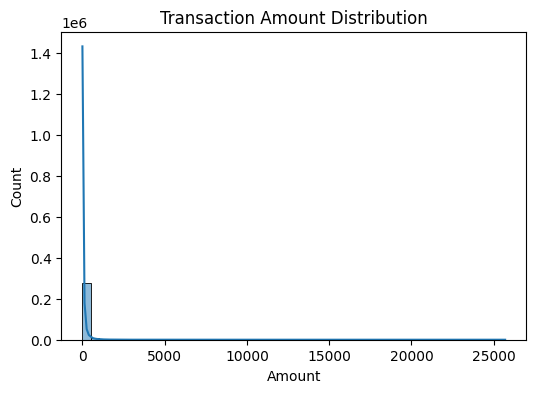

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df["Amount"], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()


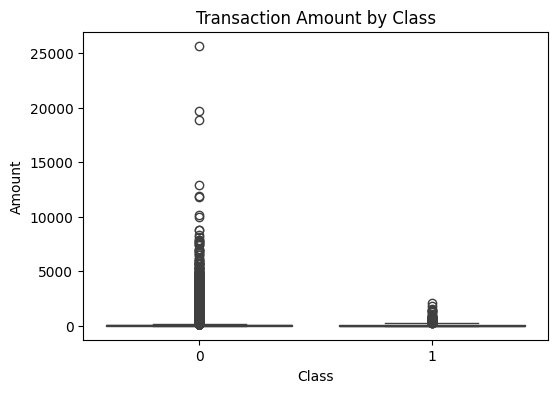

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Transaction Amount by Class")
plt.show()


In [10]:
df["Time"].describe()


count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

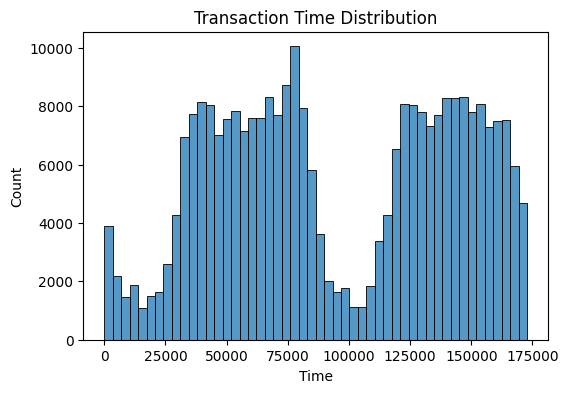

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df["Time"], bins=50)
plt.title("Transaction Time Distribution")
plt.show()


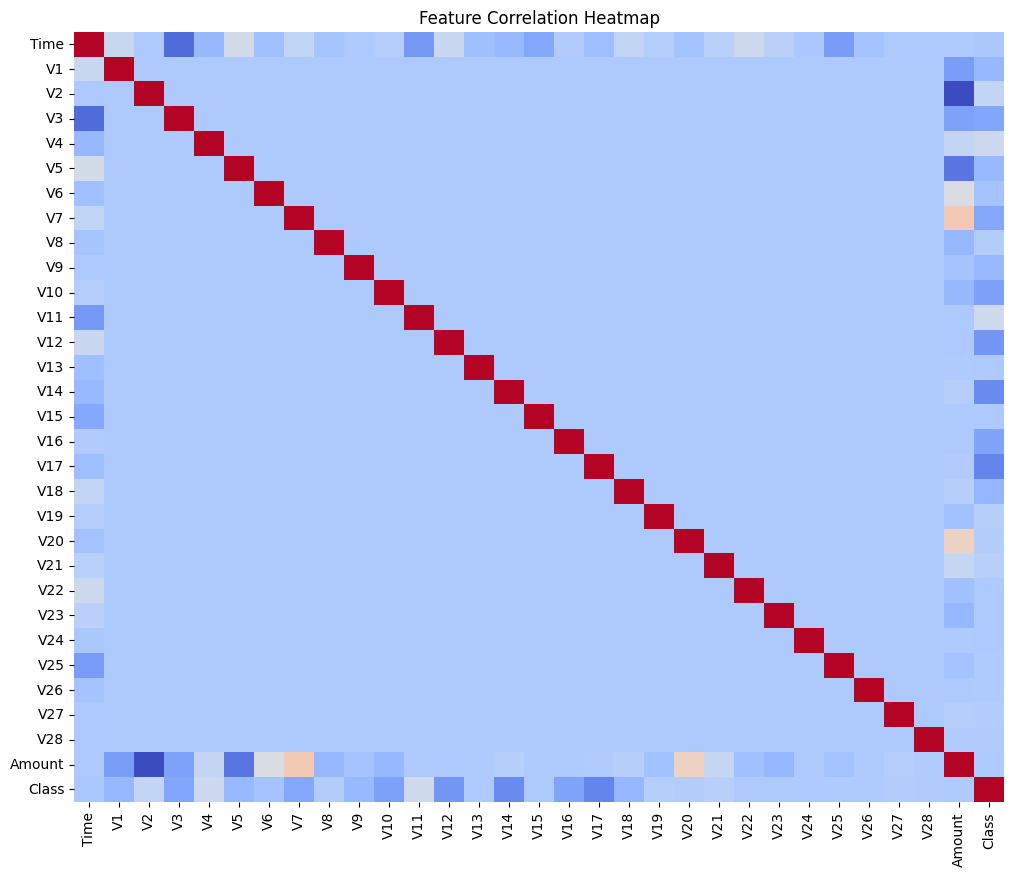

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", cbar=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [13]:
X = df.drop("Class", axis=1)
y = df["Class"]

print(X.shape, y.shape)


(284807, 30) (284807,)


## EDA Summary

- Dataset is extremely imbalanced (0.17% fraud)
- Accuracy is not a reliable metric
- Recall and Precision are more important
- Amount feature shows different behavior for fraud
- PCA features are anonymized but usable
- Dataset is suitable for supervised fraud detection
